In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import researchpy as rp

from sklearn.preprocessing import scale
from scipy import stats

plt.style.use('fivethirtyeight')
%matplotlib inline

## Reading the data

In [3]:
bs_dataset = pd.read_csv('datasets/bike_share.csv')
bs_dataset.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


# Objectif

### Does the average total number of rental bikes depend on the temperature?

# Distribution

<AxesSubplot:>

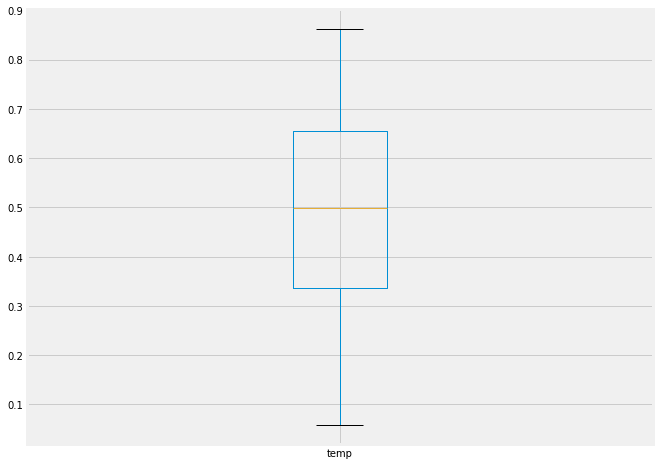

In [5]:
bs_dataset.loc[:, ['temp']].boxplot(figsize=(10,8))

In [8]:
bs_dataset.loc[:, ['temp']].describe()

,temp
count,731.000000
mean,0.495385
std,0.183051
min,0.059130
25%,0.337083
50%,0.498333
75%,0.655417
max,0.861667


In [14]:
bs_dataset.loc[:, 'temp_category'] = \
bs_dataset.loc[:, 'temp'] > bs_dataset.loc[:, 'temp'].mean()
bs_dataset.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt,temp_category
0,1,1,0,0,2,0.344167,985,False
1,1,1,0,0,2,0.363478,801,False
2,1,1,0,1,1,0.196364,1349,False
3,1,1,0,1,1,0.200000,1562,False
4,1,1,0,1,1,0.226957,1600,False


In [16]:
bs_dataset.groupby('temp_category')['cnt'].describe().T

temp_category,False,True
count,364.000000,367.000000
mean,3387.664835,5611.904632
std,1691.340133,1475.698228
min,22.000000,1115.000000
25%,1964.500000,4548.500000
50%,3301.000000,5336.000000
75%,4513.500000,6897.500000
max,8090.000000,8714.000000


<AxesSubplot:title={'center':'cnt'}, xlabel='temp_category'>

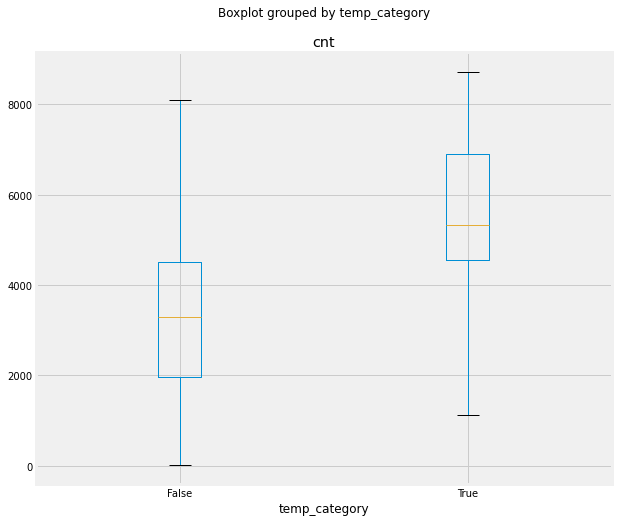

In [18]:
bs_dataset.boxplot(column='cnt', by='temp_category', figsize=(10,8))

In [20]:
sample1 = bs_dataset.loc[bs_dataset.loc[:, 'temp_category'] == True, :]
sample2 = bs_dataset.loc[bs_dataset.loc[:, 'temp_category'] == False, :]

In [21]:
sample1.shape, sample2.shape

((367, 8), (364, 8))

In [22]:
sample1 = sample1.sample(sample2.shape[0])
sample1.shape, sample2.shape

((364, 8), (364, 8))

In [23]:
stats.levene(sample1['cnt'], sample2['cnt'])

LeveneResult(statistic=5.196291436076863, pvalue=0.022924447759254837)

In [24]:
diff = scale(np.array(sample1['cnt'], dtype=np.float) \
             - np.array(sample2['cnt'], dtype=np.float))


(array([ 4.,  4., 13., 52., 49., 67., 72., 60., 35.,  8.]),
 array([-3.06843732, -2.53632786, -2.00421839, -1.47210893, -0.93999947,
        -0.40789   ,  0.12421946,  0.65632893,  1.18843839,  1.72054785,
         2.25265732]),
 <BarContainer object of 10 artists>)

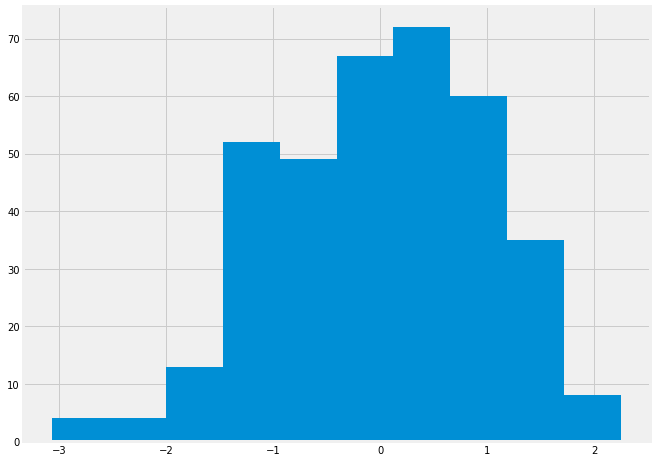

In [26]:
plt.figure(figsize=(10,8))
plt.hist(diff)

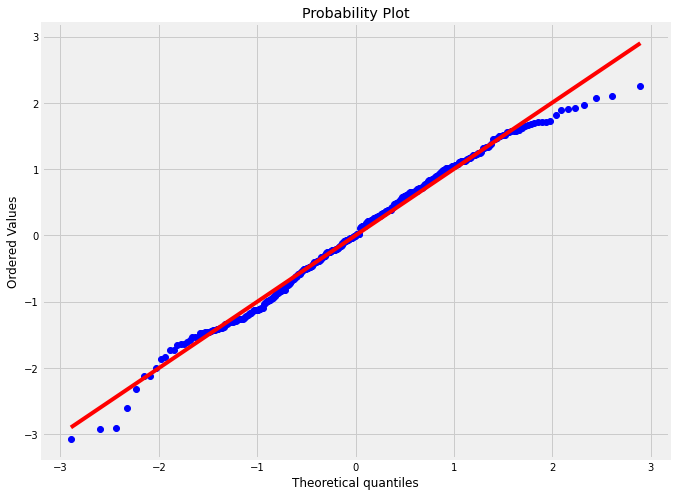

In [27]:
plt.figure(figsize=(10, 8))
stats.probplot(diff, dist='norm', plot=plt)
plt.show()

In [28]:
stats.shapiro(diff)

(0.9901120066642761, 0.014903915114700794)

In [30]:
stats.ttest_ind(sample1['cnt'], sample2['cnt'], equal_var=False)

Ttest_indResult(statistic=18.81412679168537, pvalue=2.0861208102180967e-64)

In [32]:
descriptives, results = rp.ttest(sample1['cnt'], sample2['cnt'],
                                equal_variances=False)

In [34]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,364.0,5596.557692,1468.609126,76.976034,5445.182733,5747.932652
1,cnt,364.0,3387.664835,1691.340133,88.650311,3213.332169,3561.997501
2,combined,728.0,4492.111264,1930.479497,71.548330,4351.645261,4632.577266


In [35]:
results

,Welch's t-test,results
0,Difference (cnt - cnt) =,2208.8929
1,Degrees of freedom =,711.9902
2,t =,18.8141
3,Two side test p value =,0.0000
4,Difference < 0 p value =,1.0000
5,Difference > 0 p value =,0.0000
6,Cohen's d =,1.3946
7,Hedge's g =,1.3932
8,Glass's delta =,1.5041
9,r =,0.5763
